<a href="https://colab.research.google.com/github/aritanaoya/howling_canceler/blob/master/howling_canceller_with_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install librosa==0.7

##モジュールの導入



In [0]:
import numpy as np
from matplotlib import pyplot as plt
import librosa
import wave
import struct
import librosa.core as lc  
import scipy 
import IPython.display as ipd
import os
import librosa.display
import IPython.display as ipd


##google driveとの連携

In [0]:
import os, shutil

os.getcwd()
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
id = '1iygx3kgPJzfBqeHm7-MN9SSMWNvcoy3-'  # 共有リンクで取得した id= より後の部分
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('wav_files.zip')

In [0]:
id = '1_bTGFkKc63xmMK0JtNPx29GAnfC3dmnV'  # 共有リンクで取得した id= より後の部分
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('result.zip')

In [0]:
!unzip wav_files.zip
!unzip result.zip
!ls
import librosa
import librosa.core as lc  
import numpy as np  
import scipy 
import IPython.display as ipd
import os
import matplotlib.pyplot as plt

import librosa.display
import random


##音声を読み込み分割

In [7]:
correct_sound1,sr =librosa.load("/content/wav_files/g_01.wav", sr=44100,duration=20)

correct_sounds1=[]
correct_sounds1=np.split(correct_sound1,20,axis=0)

correct_sound2,sr =librosa.load("/content/wav_files/g_02.wav", sr=44100,duration=20)
correct_sounds2=[]
correct_sounds2=np.split(correct_sound2,20,axis=0)

correct_sound3,sr =librosa.load("/content/wav_files/g_03.wav", sr=44100,duration=20)
correct_sounds3=[]
correct_sounds3=np.split(correct_sound3,20,axis=0)

correct_sound4,sr =librosa.load("/content/wav_files/g_05.wav", sr=44100,duration=20)
correct_sounds4=[]
correct_sounds4=np.split(correct_sound4,20,axis=0)

correct_sound5,sr =librosa.load("/content/wav_files/g_08.wav", sr=44100,duration=20)
correct_sounds5=[]
correct_sounds5=np.split(correct_sound5,20,axis=0)

correct_sound6,sr =librosa.load("/content/wav_files/g_09.wav", sr=44100,duration=20)
correct_sounds6=[]
correct_sounds6=np.split(correct_sound6,20,axis=0)

print(correct_sounds1[0].shape)

(44100,)


In [0]:
out_sound1,sr =librosa.load("/content/result/g_01howling_01.wav", sr=44100,duration=20)
out_sounds1=[]
out_sounds1=np.split(out_sound1,20,axis=0)

out_sound2,sr =librosa.load("/content/result/g_02howling_01.wav", sr=44100,duration=20)
out_sounds2=[]
out_sounds2=np.split(out_sound2,20,axis=0)

out_sound3,sr =librosa.load("/content/result/g_03howling_01.wav", sr=44100,duration=20)
out_sounds3=[]
out_sounds3=np.split(out_sound3,20,axis=0)

out_sound4,sr =librosa.load("/content/result/g_05howling_01.wav", sr=44100,duration=20)
out_sounds4=[]
out_sounds4=np.split(out_sound4,20,axis=0)

out_sound5,sr =librosa.load("/content/result/g_08howling_01.wav", sr=44100,duration=20)
out_sounds5=[]
out_sounds5=np.split(out_sound5,20,axis=0)

out_sound6,sr =librosa.load("/content/result/g_09howling_01.wav", sr=44100,duration=20)
out_sounds6=[]
out_sounds6=np.split(out_sound6,20,axis=0)

out_sound1_2,sr =librosa.load("/content/result/g_01howling_02.wav", sr=44100,duration=20)
out_sounds1_2=[]
out_sounds1_2=np.split(out_sound1_2,20,axis=0)

out_sound2_2,sr =librosa.load("/content/result/g_02howling_02.wav", sr=44100,duration=20)
out_sounds2_2=[]
out_sounds2_2=np.split(out_sound2_2,20,axis=0)

out_sound3_2,sr =librosa.load("/content/result/g_03howling_02.wav", sr=44100,duration=20)
out_sounds3_2=[]
out_sounds3_2=np.split(out_sound3_2,20,axis=0)

out_sound4_2,sr =librosa.load("/content/result/g_05howling_02.wav", sr=44100,duration=20)
out_sounds4_2=[]
out_sounds4_2=np.split(out_sound4_2,20,axis=0)

out_sound5_2,sr =librosa.load("/content/result/g_08howling_02.wav", sr=44100,duration=20)
out_sounds5_2=[]
out_sounds5_2=np.split(out_sound5_2,20,axis=0)

out_sound6_2,sr =librosa.load("/content/result/g_09howling_02.wav", sr=44100,duration=20)
out_sounds6_2=[]
out_sounds6_2=np.split(out_sound6_2,20,axis=0)



## Get the power spectrogram

In [9]:
def cal_power_spectrogram(y):
  x=[]
  for i in  range(len(y)):
    x.append(np.abs(librosa.stft(y[i],n_fft = 1024)))
  return x

train_files1=[]
train_files2=[]
train_files3=[]
train_files4=[]
train_files5=[]
train_filest6=[]
train_noisy_files1=[]
train_noisy_files2 =[]
train_noisy_files3 =[]
train_noisy_files4 =[]
train_noisy_files5 =[]
train_noisy_files6 =[]

train_noisy_files1_2=[]
train_noisy_files2_2 =[]
train_noisy_files3_2 =[]
train_noisy_files4_2=[]
train_noisy_files5_2=[]
train_noisy_files6_2=[]

train_files1 = cal_power_spectrogram(correct_sounds1)
train_files2 = cal_power_spectrogram(correct_sounds2)
train_files3 = cal_power_spectrogram(correct_sounds3)
train_files4 = cal_power_spectrogram(correct_sounds4)
train_files5 = cal_power_spectrogram(correct_sounds5)
train_files6 = cal_power_spectrogram(correct_sounds6)


train_noisy_files1 = cal_power_spectrogram(out_sounds1)
train_noisy_files2 = cal_power_spectrogram(out_sounds2)
train_noisy_files3 = cal_power_spectrogram(out_sounds3)
train_noisy_files4 = cal_power_spectrogram(out_sounds4)
train_noisy_files5 = cal_power_spectrogram(out_sounds5)
train_noisy_files6 = cal_power_spectrogram(out_sounds6)

train_noisy_files1_2 = cal_power_spectrogram(out_sounds1_2)
train_noisy_files2_2 = cal_power_spectrogram(out_sounds2_2)
train_noisy_files3_2 = cal_power_spectrogram(out_sounds3_2)
train_noisy_files4_2 = cal_power_spectrogram(out_sounds4_2)
train_noisy_files5_2 = cal_power_spectrogram(out_sounds5_2)
train_noisy_files6_2 = cal_power_spectrogram(out_sounds6_2)

x1 = np.array(train_files1)
train_files_1 =np.log(x1 + 1e-10)
x2 = np.array(train_files2)
train_files_2 =np.log(x2 + 1e-10)
x3 = np.array(train_files3)
train_files_3 =np.log(x3 + 1e-10)
x4 = np.array(train_files4)
train_files_4 =np.log(x4 + 1e-10)
x5 = np.array(train_files5)
train_files_5 =np.log(x5 + 1e-10)
x6 = np.array(train_files6)
train_files_6 =np.log(x6 + 1e-10)

y1  = np.array(train_noisy_files1)
train_noisy_files_1 =np.log(y1+ 1e-10)
y2  = np.array(train_noisy_files2)
train_noisy_files_2 =np.log(y2+ 1e-10)
y3  = np.array(train_noisy_files3)
train_noisy_files_3 =np.log(y3+ 1e-10)
y4  = np.array(train_noisy_files4)
train_noisy_files_4 =np.log(y4+ 1e-10)
y5  = np.array(train_noisy_files5)
train_noisy_files_5 =np.log(y5+ 1e-10)
y6  = np.array(train_noisy_files6)
train_noisy_files_6 =np.log(y6+ 1e-10)

y1  = np.array(train_noisy_files1_2)
train_noisy_files_1_2 =np.log(y1+ 1e-10)
y2  = np.array(train_noisy_files2_2)
train_noisy_files_2_2 =np.log(y2+ 1e-10)
y3  = np.array(train_noisy_files3_2)
train_noisy_files_3_2 =np.log(y3+ 1e-10)
y4  = np.array(train_noisy_files4_2)
train_noisy_files_4_2 =np.log(y4+ 1e-10)
y5  = np.array(train_noisy_files5_2)
train_noisy_files_5_2 =np.log(y5+ 1e-10)
y6  = np.array(train_noisy_files6_2)
train_noisy_files_6_2 =np.log(y6+ 1e-10)

print(train_files_1[0].shape)

(513, 173)


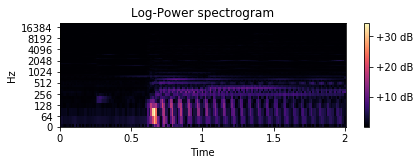

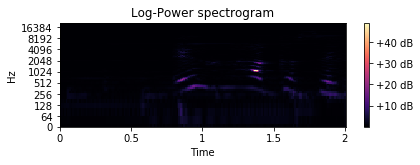

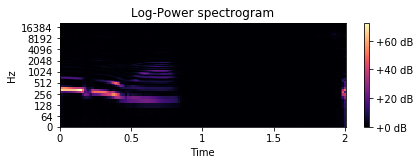

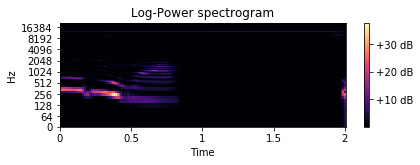

In [10]:
#音声プロット
#パワースペクトルと対数パワースペクトル

def plt_power_spec(S,sr):
  plt.figure()
  plt.subplot(2, 1, 2)
  #S1 = np.exp(S)
  librosa.display.specshow(S,
                         sr=sr, y_axis='log', x_axis='time')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Log-Power spectrogram')
  plt.tight_layout()
  plt.show()
  

plt_power_spec(np.exp(train_files_6[1]),44100)
plt_power_spec(np.exp(train_noisy_files_2[1]),44100)
plt_power_spec(np.exp(train_files_3[1]),44100)
plt_power_spec(np.exp(train_noisy_files_3[1]),44100)




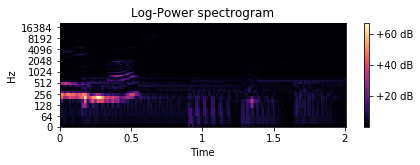

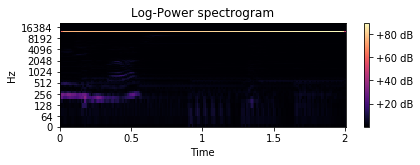

In [12]:
plt_power_spec(np.exp(train_files_6[17]),44100)
plt_power_spec(np.exp(train_noisy_files_6[17]),44100) 

##型の変更,生成

In [13]:
freq = 513
time = 173

train_num1 =20
train_num2 =20
train_num3 =20
train_num4 =20
train_num5 =20
train_num6 =20
#型の変更
x_train1 = np.zeros(freq*time*train_num1).reshape(train_num1, freq, time)
x_train2 = np.zeros(freq*time*train_num2).reshape(train_num2, freq, time)
x_train3 = np.zeros(freq*time*train_num3).reshape(train_num3, freq, time)
x_train4 = np.zeros(freq*time*train_num4).reshape(train_num4, freq, time)
x_train5 = np.zeros(freq*time*train_num5).reshape(train_num5, freq, time)
x_train6 = np.zeros(freq*time*train_num6).reshape(train_num6, freq, time)

x_train_noisy1=np.zeros(freq*time*train_num1).reshape(train_num1, freq, time)
x_train_noisy2=np.zeros(freq*time*train_num2).reshape(train_num2, freq, time)
x_train_noisy3=np.zeros(freq*time*train_num3).reshape(train_num3, freq, time)
x_train_noisy4=np.zeros(freq*time*train_num4).reshape(train_num4, freq, time)
x_train_noisy5=np.zeros(freq*time*train_num5).reshape(train_num5, freq, time)
x_train_noisy6=np.zeros(freq*time*train_num6).reshape(train_num6, freq, time)

x_train_noisy1_2=np.zeros(freq*time*train_num1).reshape(train_num1, freq, time)
x_train_noisy2_2=np.zeros(freq*time*train_num2).reshape(train_num2, freq, time)
x_train_noisy3_2=np.zeros(freq*time*train_num3).reshape(train_num3, freq, time)
x_train_noisy4_2=np.zeros(freq*time*train_num4).reshape(train_num4, freq, time)
x_train_noisy5_2=np.zeros(freq*time*train_num5).reshape(train_num5, freq, time)
x_train_noisy6_2=np.zeros(freq*time*train_num6).reshape(train_num6, freq, time)

print(x_train1.shape)
print(x_train_noisy1.shape)

(20, 513, 173)
(20, 513, 173)


In [0]:
#関数の定義
def min_max(x, axis=None):
    xmin = x.min(axis=axis, keepdims=True)
    xmax = x.max(axis=axis, keepdims=True)
    result = (x- xmin)/(xmax-xmin)

    return result, xmin ,xmax

def re_min_max(x, min ,max):
  result = x * (max - min) + min
  return result



In [15]:

#正規化
x_train1 , trainmin1 , trainmax1 = min_max(train_files_1)
x_train2 , trainmin2 , trainmax2 = min_max(train_files_2)
x_train3 , trainmin3 , trainmax3 = min_max(train_files_3)
x_train4 , trainmin4 , trainmax4 = min_max(train_files_4)
x_train5 , trainmin5 , trainmax5 = min_max(train_files_5)
x_train6 , trainmin6 , trainmax6 = min_max(train_files_6)

x_train_noisy1, trainmin_noisy1, trainmax_noisy1 = min_max(train_noisy_files_1)
x_train_noisy2, trainmin_noisy2, trainmax_noisy2 = min_max(train_noisy_files_2)
x_train_noisy3, trainmin_noisy3, trainmax_noisy3 = min_max(train_noisy_files_3)
x_train_noisy4, trainmin_noisy4, trainmax_noisy4 = min_max(train_noisy_files_4)
x_train_noisy5, trainmin_noisy5, trainmax_noisy5 = min_max(train_noisy_files_5)
x_train_noisy6, trainmin_noisy6, trainmax_noisy6 = min_max(train_noisy_files_6)

x_train_noisy1_2, trainmin_noisy1_2, trainmax_noisy1_2 = min_max(train_noisy_files_1_2)
x_train_noisy2_2, trainmin_noisy2_2, trainmax_noisy2_2 = min_max(train_noisy_files_2_2)
x_train_noisy3_2, trainmin_noisy3_2, trainmax_noisy3_2 = min_max(train_noisy_files_3_2)
x_train_noisy4_2, trainmin_noisy4_2, trainmax_noisy4_2 = min_max(train_noisy_files_4_2)
x_train_noisy5_2, trainmin_noisy5_2, trainmax_noisy5_2 = min_max(train_noisy_files_5_2)
x_train_noisy6_2, trainmin_noisy6_2, trainmax_noisy6_2 = min_max(train_noisy_files_6_2)

print(x_train_noisy1.shape)

(20, 513, 173)


In [16]:
# CNN用にデータを(batch_size, freq, time, 1)にreshape    
x_train1_re=x_train1.reshape(train_num1, freq, time, 1)
x_train2_re=x_train2.reshape(train_num2, freq, time, 1)
x_train3_re=x_train3.reshape(train_num3, freq, time, 1)
x_train4_re=x_train4.reshape(train_num4, freq, time, 1)
x_train5_re=x_train5.reshape(train_num5, freq, time, 1)
x_train6_re=x_train6.reshape(train_num6, freq, time, 1)

x_train_noisy1_re=x_train_noisy1.reshape(train_num1, freq, time, 1)
x_train_noisy2_re=x_train_noisy2.reshape(train_num2, freq, time, 1)
x_train_noisy3_re=x_train_noisy3.reshape(train_num3, freq, time, 1)
x_train_noisy4_re=x_train_noisy4.reshape(train_num4, freq, time, 1)
x_train_noisy5_re=x_train_noisy5.reshape(train_num5, freq, time, 1)
x_train_noisy6_re=x_train_noisy6.reshape(train_num6, freq, time, 1)

x_train_noisy1_2_re=x_train_noisy1_2.reshape(train_num1, freq, time, 1)
x_train_noisy2_2_re=x_train_noisy2_2.reshape(train_num2, freq, time, 1)
x_train_noisy3_2_re=x_train_noisy3_2.reshape(train_num3, freq, time, 1)
x_train_noisy4_2_re=x_train_noisy4_2.reshape(train_num4, freq, time, 1)
x_train_noisy5_2_re=x_train_noisy5_2.reshape(train_num5, freq, time, 1)
x_train_noisy6_2_re=x_train_noisy6_2.reshape(train_num6, freq, time, 1)

print(x_train2_re.shape)
print(x_train_noisy2_re.shape)

(20, 513, 173, 1)
(20, 513, 173, 1)


##Deep Learning

In [17]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten,Reshape,MaxPooling2D,UpSampling2D
from keras.layers import Conv2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Add
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers

# Win5-RB
input_img = Input(shape=(513, 173, 1))
x = Conv2D(64, (7, 7), padding='same')(input_img)
x = BatchNormalization()(x)
x = Activation('relu')(x)

for i in range(10):
    x = Conv2D(64, (7, 7), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

x = Conv2D(1, (7, 7), padding='same')(x)
x = BatchNormalization()(x)
output_img = layers.add([x, input_img])

# compile
model = Model(input_img, output_img)
model.compile(optimizer='adam', loss='mean_squared_error')

Using TensorFlow backend.


In [18]:
x_train1 = x_train1_re[0:15,:,:,:]
x_train2 = x_train2_re[0:15,:,:,:]
x_train3 = x_train3_re[0:15,:,:,:]
x_train4 = x_train4_re[0:15,:,:,:]
x_train5 = x_train5_re[0:15,:,:,:]
x_train6 = x_train6_re[0:15,:,:,:]

x_noisy1 = x_train_noisy1_re[0:15,:,:,:]
x_noisy2 = x_train_noisy2_re[0:15,:,:,:]
x_noisy3 = x_train_noisy3_re[0:15,:,:,:]
x_noisy4 = x_train_noisy4_re[0:15,:,:,:]
x_noisy5 = x_train_noisy5_re[0:15,:,:,:]
x_noisy6 = x_train_noisy6_re[0:15,:,:,:]

x_noisy1_2 = x_train_noisy1_2_re[0:15,:,:,:]
x_noisy2_2 = x_train_noisy2_2_re[0:15,:,:,:]
x_noisy3_2 = x_train_noisy3_2_re[0:15,:,:,:]
x_noisy4_2 = x_train_noisy4_2_re[0:15,:,:,:]
x_noisy5_2 = x_train_noisy5_2_re[0:15,:,:,:]
x_noisy6_2 = x_train_noisy6_2_re[0:15,:,:,:]

x_val1 = x_train1_re[15:,:,:,:]
x_val2 = x_train2_re[15:,:,:,:]
x_val3 = x_train3_re[15:,:,:,:]
x_val4 = x_train4_re[15:,:,:,:]
x_val5 = x_train5_re[15:,:,:,:]
x_val6 = x_train6_re[15:,:,:,:]

x_noisy_val1 =x_train_noisy1_re[15:,:,:,:]
x_noisy_val2 =x_train_noisy2_re[15:,:,:,:]
x_noisy_val3 =x_train_noisy3_re[15:,:,:,:]
x_noisy_val4 =x_train_noisy4_re[15:,:,:,:]
x_noisy_val5 =x_train_noisy5_re[15:,:,:,:]
x_noisy_val6 =x_train_noisy6_re[15:,:,:,:]

x_noisy_val1_2 =x_train_noisy1_2_re[15:,:,:,:]
x_noisy_val2_2 =x_train_noisy2_2_re[15:,:,:,:]
x_noisy_val3_2 =x_train_noisy3_2_re[15:,:,:,:]
x_noisy_val4_2 =x_train_noisy4_2_re[15:,:,:,:]
x_noisy_val5_2 =x_train_noisy5_2_re[15:,:,:,:]
x_noisy_val6_2 =x_train_noisy6_2_re[15:,:,:,:]

print(x_val2.shape)
print(x_noisy_val2.shape)


(5, 513, 173, 1)
(5, 513, 173, 1)


##パラメタ調節

In [0]:
epochs =30
saveDir = "/content/howling_canceller_DnCNN"
if not os.path.isdir(saveDir):
    os.makedirs(saveDir)

##訓練

In [34]:

def get_batch(x, y, batch_size, shuffle=False):
    '''ミニバッチを生成するジェネレーター関数
    '''
    x = np.array(x)
    num_samples = len(x)
    if shuffle:
        indices = np.random.permutation(num_samples)
    else:
        indices = np.arange(num_samples)
    num_iterations = np.ceil(num_samples / batch_size).astype(int)
    for itr in range(num_iterations):
        start = batch_size * itr
        excerpt = indices[start:start + batch_size]
        yield x[excerpt], y[excerpt]
# train
train_loss1=[]
val_loss1=[]
train_loss2=[]
val_loss2=[]
train_loss3=[]
val_loss3=[]
train_loss4=[]
val_loss4=[]
train_loss5=[]
val_loss5=[]
train_loss6=[]
val_loss6=[]
for i in range(epochs):

  print("epoch:",i+1)
  for x_batch1, y_batch1 in get_batch(x_noisy1, x_train1, batch_size=1):
    history = model.train_on_batch(x_batch1, y_batch1)
  train1 = model.evaluate(x_noisy1,x_train1)
  val1 = model.evaluate(x_noisy_val1,x_val1)
  train_loss1.append(train1)
  val_loss1.append(val1)

  for x_batch2, y_batch2 in get_batch(x_noisy2, x_train2, batch_size=1):
    history = model.train_on_batch(x_batch2, y_batch2)
  train2 = model.evaluate(x_noisy2,x_train2)
  val2 = model.evaluate(x_noisy_val2,x_val2)
  train_loss2.append(train2)
  val_loss2.append(val2)

  for x_batch3, y_batch3 in get_batch(x_noisy3, x_train3, batch_size=1):
    history = model.train_on_batch(x_batch3, y_batch3)
  train3 = model.evaluate(x_noisy3,x_train3)
  val3 = model.evaluate(x_noisy_val3,x_val3)
  train_loss3.append(train3)
  val_loss3.append(val3)

  for x_batch4, y_batch4 in get_batch(x_noisy4, x_train4, batch_size=1):
    history = model.train_on_batch(x_batch4, y_batch4)
  train4 = model.evaluate(x_noisy4,x_train4)
  val4 = model.evaluate(x_noisy_val4,x_val4)
  train_loss4.append(train4)
  val_loss4.append(val4)

  for x_batch5, y_batch5 in get_batch(x_noisy5, x_train5, batch_size=1):
    history = model.train_on_batch(x_batch5, y_batch5)
  train5 = model.evaluate(x_noisy5,x_train5)
  val5 = model.evaluate(x_noisy_val5,x_val5)
  train_loss5.append(train5)
  val_loss5.append(val5)

  for x_batch6, y_batch6 in get_batch(x_noisy6, x_train6, batch_size=1):
    history = model.train_on_batch(x_batch6, y_batch6)
  train6 = model.evaluate(x_noisy6,x_train6)
  val6 = model.evaluate(x_noisy_val6,x_val6)
  train_loss6.append(train6)
  val_loss6.append(val6)

  for x_batch1_2, y_batch1_2 in get_batch(x_noisy1_2, x_train1, batch_size=1):
    history = model.train_on_batch(x_batch1_2, y_batch1_2)
  for x_batch2_2, y_batch2_2 in get_batch(x_noisy2_2, x_train2, batch_size=1):
    history = model.train_on_batch(x_batch2_2, y_batch2_2)
  for x_batch3_2, y_batch3_2 in get_batch(x_noisy3_2, x_train3, batch_size=1):
    history = model.train_on_batch(x_batch3_2, y_batch3_2)
  for x_batch4_2, y_batch4_2 in get_batch(x_noisy4_2, x_train4, batch_size=1):
    history = model.train_on_batch(x_batch4_2, y_batch4_2)
  for x_batch5_2, y_batch5_2 in get_batch(x_noisy5_2, x_train5, batch_size=1):
    history = model.train_on_batch(x_batch5_2, y_batch5_2)
  for x_batch6_2, y_batch6_2 in get_batch(x_noisy6_2, x_train6, batch_size=1):
    history = model.train_on_batch(x_batch6_2, y_batch6_2)

epoch: 1
5/5 [==============================] - 0s 73ms/step
epoch: 2
5/5 [==============================] - 0s 73ms/step
epoch: 3
5/5 [==============================] - 0s 73ms/step
epoch: 4
5/5 [==============================] - 0s 73ms/step
epoch: 5
5/5 [==============================] - 0s 73ms/step
epoch: 6
5/5 [==============================] - 0s 73ms/step
epoch: 7
5/5 [==============================] - 0s 72ms/step
epoch: 8
5/5 [==============================] - 0s 73ms/step
epoch: 9
5/5 [==============================] - 0s 73ms/step
epoch: 10
5/5 [==============================] - 0s 72ms/step


###train_lossとval_lossの表示

No handles with labels found to put in legend.


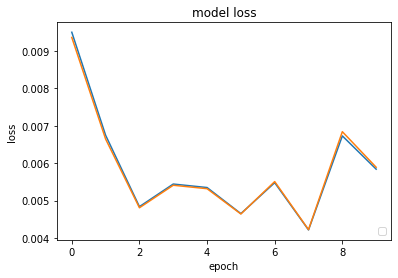

5/5 [==============================] - 0s 76ms/step
train_loss: 0.004822770599275827
test_loss: 0.004865250550210476


In [35]:
plt.plot(train_loss1)
plt.plot(val_loss1)
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()
train1 = model.evaluate(x_noisy1,x_train1)
test1 = model.evaluate(x_noisy_val1,x_val1)
print("train_loss:",train1)
print("test_loss:",test1)

No handles with labels found to put in legend.


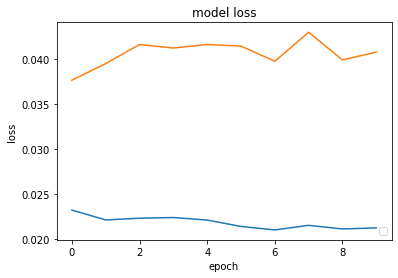

5/5 [==============================] - 0s 76ms/step
train_loss: 0.021783415228128433
test_loss: 0.04308859631419182


In [36]:
plt.plot(train_loss2)
plt.plot(val_loss2)
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()
train2 = model.evaluate(x_noisy2,x_train2)
test2 = model.evaluate(x_noisy_val2,x_val2)
print("train_loss:",train2)
print("test_loss:",test2)

No handles with labels found to put in legend.


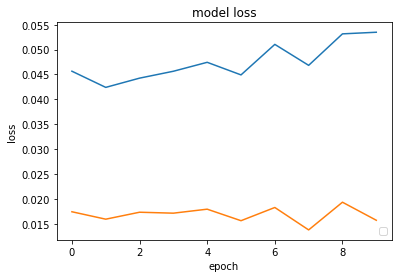

5/5 [==============================] - 0s 78ms/step
train_loss: 0.03492596372961998
test_loss: 0.013694780878722668


In [37]:
plt.plot(train_loss3)
plt.plot(val_loss3)
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()
train3 = model.evaluate(x_noisy3,x_train3)
test3 = model.evaluate(x_noisy_val3,x_val3)
print("train_loss:",train3)
print("test_loss:",test3)

No handles with labels found to put in legend.


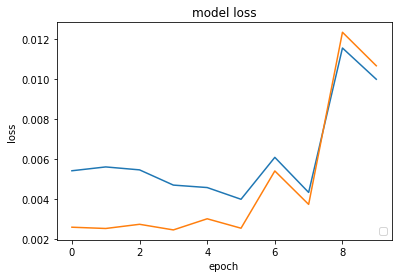

5/5 [==============================] - 0s 79ms/step
train_loss: 0.0034687528386712074
test_loss: 0.0034352310467511415


In [38]:
plt.plot(train_loss4)
plt.plot(val_loss4)
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()
train4 = model.evaluate(x_noisy4,x_train4)
test4 = model.evaluate(x_noisy_val4,x_val4)
print("train_loss:",train4)
print("test_loss:",test4)

In [0]:
plt.plot(train_loss5)
plt.plot(val_loss5)
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()
train5 = model.evaluate(x_noisy5,x_train5)
test5 = model.evaluate(x_noisy_val5,x_val5)
print("train_loss:",train5)
print("test_loss:",test5)

In [0]:
plt.plot(train_loss6)
plt.plot(val_loss6)
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()
train6 = model.evaluate(x_noisy6,x_train6)
test6 = model.evaluate(x_noisy_val6,x_val6)
print("train_loss:",train6)
print("test_loss:",test6)

##predict

In [0]:
import time

In [88]:
#時間計測
t1 = time.time() 
 
how_cancel=model.predict(x_noisy_val5)
how_cancel1=[]
how_cancel_re=[]
how_cancel_gri=[]
for i in range(len(how_cancel)):
  how_cancel1.append(np.exp(how_cancel[i] * (trainmax_noisy1 - trainmin_noisy1) + trainmin_noisy1))
  how_cancel_re.append(how_cancel1[i].reshape(513,173*1))
  how_cancel_gri.append(lc.griffinlim(how_cancel_re[i]))


cancel=np.concatenate([how_cancel_gri[0], how_cancel_gri[1],how_cancel_gri[2],how_cancel_gri[3],how_cancel_gri[4]],axis =0)
# 処理後の時刻
t2 = time.time()



# 経過時間を表示
elapsed_time = t2-t1
print(f"経過時間：{elapsed_time}")
ipd.Audio(data=cancel,rate=44100)

経過時間：2.0383899211883545


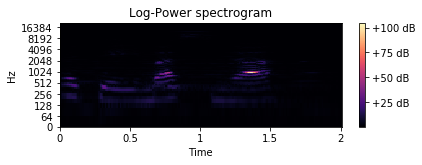

In [89]:
plt_power_spec(how_cancel_re[0],44100)

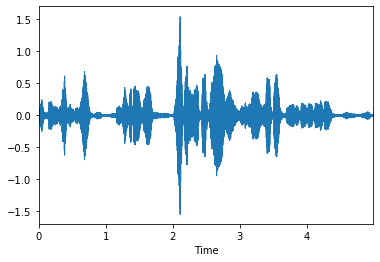

In [90]:
librosa.display.waveplot(cancel, sr=44100)

##元音声

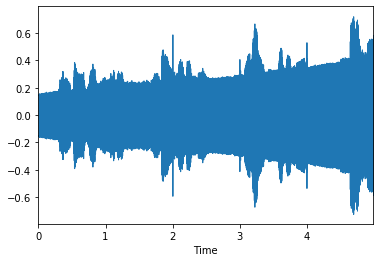

In [91]:

y0=[]
y=[]
y_gri=[]
for i in range(len(how_cancel)):
  y0.append(np.exp(x_noisy_val4[i]*(trainmax_noisy1 - trainmin_noisy1) + trainmin_noisy1))
  y.append(y0[i].reshape(513,173*1))
  y_gri.append(lc.griffinlim(y[i]))

test_audio=np.concatenate([y_gri[0], y_gri[1],y_gri[2],y_gri[3],y_gri[4]],axis =0)


librosa.display.waveplot(test_audio, sr=44100)

ipd.Audio(data=test_audio,rate=44100)
#print(test_audio)


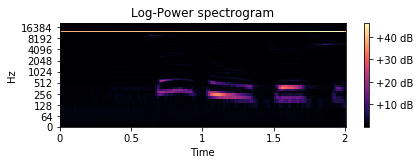

In [92]:
plt_power_spec(y[0],44100)

モデルの保存

In [52]:
json_string = model.to_json()
open('how_cancel_model.json', 'w').write(json_string)

7964

In [0]:
model.save_weights('howlingcanceller_Resnet_model_1106_wights.h5')

In [0]:
model.load_weights('how_cancel_model_wights.h5')